 # SURVIVAL PREDICTION OF TITANIC PASSENGERS

In [1]:
#Python 3
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic-image/Titanic.jpeg


## INTRODUCTION

*This is the legendary Titanic ML activity – the best, first challenge for you to dive into ML activity and familiarize yourself with data science.The activity is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck using the available dataset.*

In [2]:
import IPython.display as display
train = pd.read_csv("/kaggle/input/titanic/train.csv") #Enter your train dataset location
test = pd.read_csv("/kaggle/input/titanic/test.csv") #Enter your test dataset location

*In the above shell command, the datasets are retrieved from the input directory.*

## VISUALIZATION

Data visualization is an important aspect of data science as it makes the insights easy to interpret the data.  Visuals are the easiest way to analyze and absorb information to understand and decode complex problems. They help to identify patterns and relationships in data.  

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

*In the below function the feature is extracted based on the dependence of the survival feature. Later both the survived and death counts are allocated a Data structure of pandas as **DataFrame**. The plot for the two elements is made as a bar chart and stacked over on another. *

In [4]:
def chart(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    death = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived,death])
    df.index = ["Survived","Dead"]
    df.plot(kind = "bar", stacked = True ,figsize = (10,5))

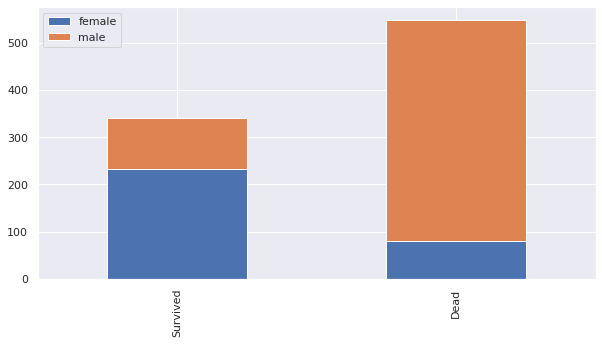

In [5]:
chart("Sex")

*From the above chart, we can gather an insight that the amount of men who survived the shipwreck is less than the number of men dead over the shipwreck.*

## FEATURE EXTRACTION

*Feature extraction starts from the initial set of measured data to build a derived value known as a feature to convey informative and non-redundant knowledge. When input data is too large to be processed and it is suspected to be having a repetition of the same measurement then it is processed to fill the null value and remove a repeated value for the betterment of the dataset.*

*Feature extraction is considered as a direct influencing factor towards the performance of a predictive model.*

### **Regex**

*Regex is derived from the term regular expression also known as rational expression. This package is used in string algorithms to extract a certain kind of search pattern.
For more information related to [regex](http://https://docs.python.org/3/library/re.html "Regex documentation") do visit the link.*

*In the below cell the Name column of the provided dataset is manipulated in a meaningful manner. The regex function is used to extract the title tags from the provided name columns.*

In [6]:
import re
train_test = [train,test]
for dataset in train_test:
    dataset["Title"] = dataset["Name"].str.extract("([A-Za-z]+)\.", expand = False )

In [7]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Jonkheer      1
Countess      1
Ms            1
Capt          1
Don           1
Sir           1
Lady          1
Name: Title, dtype: int64

In [8]:
title_dict = {}
for title in train["Title"]:
    if title== "Mr":
        title_dict[title] = 0.0
    if title == "Miss":
        title_dict[title] = 1.0
    if title == "Mrs":
        title_dict[title] = 2.0
    else:
        title_dict[title] = 3.0
for title in test["Title"]:
    if title== "Mr":
        title_dict[title] = 0.0
    if title == "Miss":
        title_dict[title] = 1.0
    if title == "Mrs":
        title_dict[title] = 2.0
    else:
        title_dict[title] = 3.0
        
title_dict

{'Mr': 3.0,
 'Mrs': 2.0,
 'Miss': 3.0,
 'Master': 3.0,
 'Don': 3.0,
 'Rev': 3.0,
 'Dr': 3.0,
 'Mme': 3.0,
 'Ms': 3.0,
 'Major': 3.0,
 'Lady': 3.0,
 'Sir': 3.0,
 'Mlle': 3.0,
 'Col': 3.0,
 'Capt': 3.0,
 'Countess': 3.0,
 'Jonkheer': 3.0,
 'Dona': 3.0}

In [9]:
for dataset in train_test:
    dataset["Title"] = dataset["Title"].map(title_dict)


In [10]:
train.drop("Name" , axis = 1, inplace = True)
test.drop("Name" , axis = 1, inplace = True)

*The sex column won't be provided with data as the values of the column are in string formats. Thus the values of the columns are converted into the numerical format for vector manipulation.*

In [11]:
sex_dict = {"male" : 0, "female" : 1}
for dataset in train_test:
    dataset["Sex"] = dataset["Sex"].map(sex_dict)

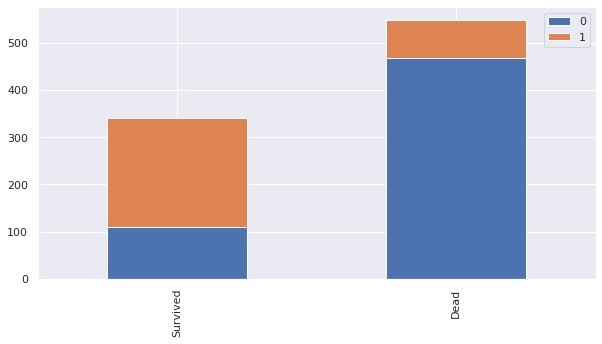

In [12]:
chart("Sex")

*The missing value of the age columns are filled by taking the average of age in correlation with the title column of the provided dataset. The method used here is fillna from pandas.*

In [13]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace = True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median") , inplace = True)

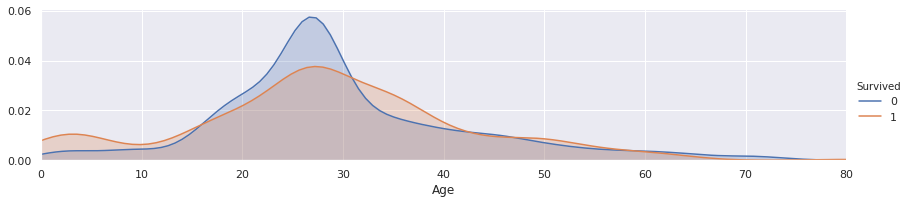

In [14]:
facecet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facecet.map(sns.kdeplot,"Age",shade = True)
facecet.set(xlim = (0,train["Age"].max()))
facecet.add_legend()
plt.show()

The person between age of (34 to 42)yrs have a more likely chance to survive the crash.

(34.0, 42.0)

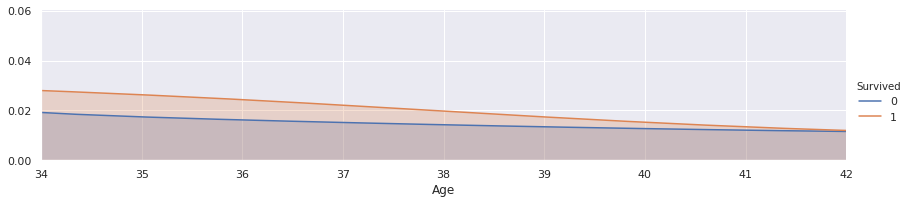

In [15]:
facecet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facecet.map(sns.kdeplot,"Age",shade = True)
facecet.set(xlim = (0,train["Age"].max()))
facecet.add_legend()

plt.xlim(34,42)

(0.0, 17.0)

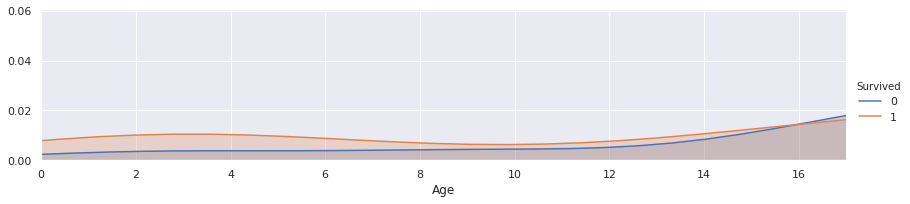

In [16]:
facecet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facecet.map(sns.kdeplot,"Age",shade = True)
facecet.set(xlim = (0,train["Age"].max()))
facecet.add_legend()
plt.xlim(0,17)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,3.0


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


In [19]:
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 16,"Age"] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26),"Age"] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36),"Age"] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62),"Age"] = 3
    dataset.loc[ dataset['Age'] > 62,"Age"] = 4

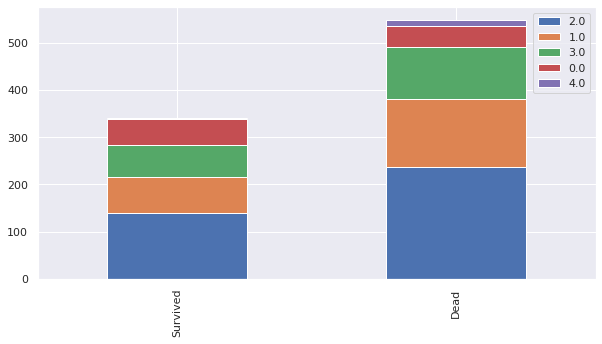

In [20]:
chart("Age")

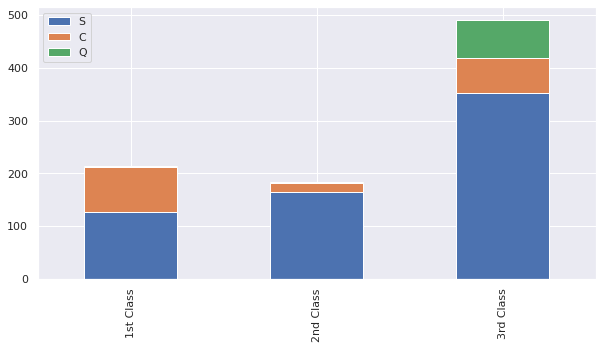

In [21]:
Pclass1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Embarked"].value_counts()
pclass = pd.DataFrame([Pclass1,Pclass2,Pclass3])
pclass.index = ["1st Class","2nd Class","3rd Class"]
pclass.plot(kind ="bar",stacked = True, figsize = (10,5))

In [22]:
for dataset in train_test:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [23]:
embarked_dict = {"S":0, "C":1, "Q":2}
for dataset in train_test:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_dict)

In [24]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace = True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace = True)

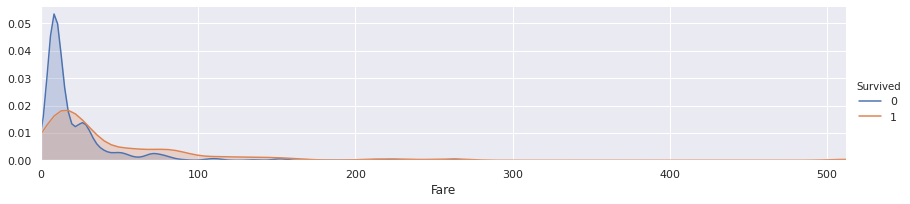

In [25]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Fare" , shade = True)
facet.set(xlim = (0,train["Fare"].max()))
facet.add_legend()
plt.show()

(17.0, 30.0)

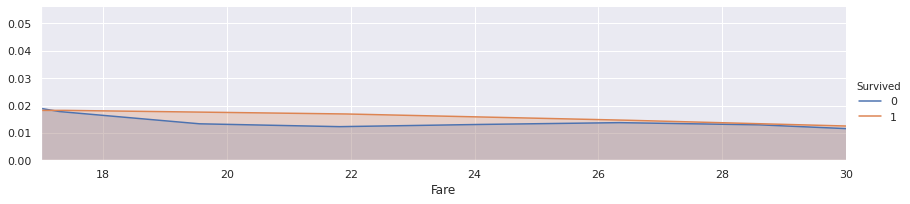

In [26]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Fare" , shade = True)
facet.set(xlim = (0,train["Fare"].max()))
facet.add_legend()
plt.xlim(17,30)

In [27]:
for dataset in train_test:
    dataset.loc[dataset["Fare"] <= 17, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30),"Fare"] = 1
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 100,"Fare"] = 3
    

In [28]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
C22 C26        3
              ..
A19            1
E68            1
D30            1
B38            1
C45            1
Name: Cabin, Length: 147, dtype: int64

In [29]:
for dataset in train_test:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

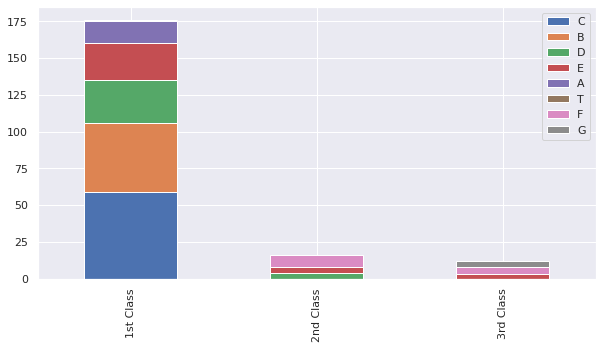

In [30]:
Pclass1 = train[train["Pclass"] == 1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"] == 2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"] == 3]["Cabin"].value_counts()
pclass = pd.DataFrame([Pclass1, Pclass2, Pclass3])
pclass.index = ["1st Class","2nd Class", "3rd Class"]
pclass.plot(kind = "bar", stacked = True, figsize = (10,5))

In [31]:
cabin_dict = {"A" : 0,"B" : 0.4, "C": 0.8, "D":1.2, "E" :1.6, "F" : 2.0, "G" : 2.4, "T": 2.8}
for dataset in train_test:
    dataset["Cabin"] = dataset.Cabin.map(cabin_dict)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,3.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,3.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,3.0


In [33]:
train.Cabin.fillna(train.groupby("Pclass").Cabin.transform("median"),inplace = True)
test.Cabin.fillna(test.groupby("Pclass").Cabin.transform("median"),inplace = True)

# **Short forms**

_The below two field provided are combined to form a new field know as **"Family_Size"** :-_
- SibSp = "Single Child Single Parent"
- Parch = "Parents and child"

In [34]:
train["Family_size"] = train["SibSp"] + train["Parch"] + 1
test["Family_size"] = test["SibSp"] + test["Parch"] + 1 


(0.0, 11.0)

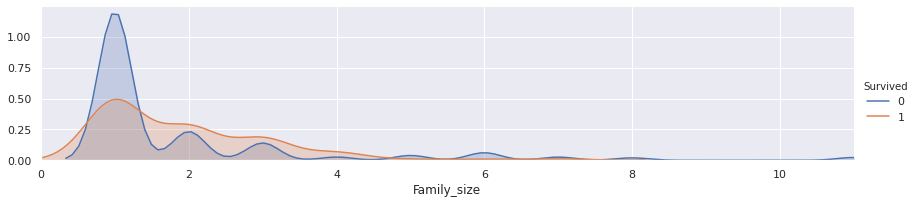

In [35]:
facet = sns.FacetGrid(train,hue = "Survived",aspect = 4)
facet.map(sns.kdeplot,"Family_size",shade = True)
facet.set(xlim = (0,train["Family_size"].max()))
facet.add_legend()
plt.xlim(0)

In [36]:
family_mapping = {1 : 0, 2 : 0.4, 3 : 0.8, 4 : 1.2, 5 : 1.6, 6: 2.0, 7 :2.4, 8 : 2.8, 9: 3.2, 10: 3.6, 11: 4.0}
for dataset in train_test:
    dataset["Family_size"]=dataset["Family_size"].map(family_mapping)

In [37]:
feature_drop = ["SibSp","Parch","Ticket"]
train = train.drop(feature_drop, axis = 1)
test = test.drop(feature_drop,axis = 1)
train = train.drop("PassengerId", axis = 1)

In [38]:
train_data = train.drop("Survived" ,axis = 1)
target = train["Survived"]
train.shape, test.shape

((891, 9), (418, 9))

# FINAL VECTOR

 _The dataset is finally made informative by dropping unnecessary values. The below-provided data can be used directly to train and predict with help of the machine learning model._

In [39]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,3,0,1.0,0.0,2.0,0,3.0,0.4
1,1,1,3.0,2.0,0.8,1,2.0,0.4
2,3,1,1.0,0.0,2.0,0,3.0,0.0
3,1,1,2.0,2.0,0.8,0,2.0,0.4
4,3,0,2.0,0.0,2.0,0,3.0,0.0
5,3,0,2.0,0.0,2.0,2,3.0,0.0
6,1,0,3.0,2.0,1.6,0,3.0,0.0
7,3,0,0.0,1.0,2.0,0,3.0,1.6
8,3,1,2.0,0.0,2.0,0,2.0,0.8
9,2,1,0.0,2.0,1.8,1,2.0,0.4


# TRAINING AND PREDICTION

_The list of classifiers are mentioned below:-_
* _GradientBoostingClassifier_
* _RandomForestClassifier_
* _KNeighborsClassifier_
* _svmClassifier_

_The classifier used by us in this activity is KNeighborsClassifier()_

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0 )

In [42]:
cfl = KNeighborsClassifier(n_neighbors = 13)
scoring = "accuracy"
score = cross_val_score(cfl ,train_data,target,cv = k_fold, n_jobs = 1, scoring = scoring)


In [43]:
round(np.mean(score)*100,2)


80.92

_The score value predicted for the output is given as 80.92%_

### *_PREDECTION_*

In [44]:
cfl.fit(train_data,target)



KNeighborsClassifier(n_neighbors=13)

In [45]:
test_data = test.drop("PassengerId",axis = 1).copy()

In [46]:
predict = cfl.predict(test_data)

In [47]:
submission = pd.DataFrame({"PassengerId" : test["PassengerId"],
                          "Survived" : predict})

In [48]:
submission.to_csv("submission.csv" , index = False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
